In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('/Users/tuxiaochi/Desktop/jupyternb/we_data/train.csv')
df.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [6]:
import collections
# a = [1,1,1,1,2,2,2,2,3,3,4,5,5]
a = df.payprice
# counter=collections.Counter(a)
a = pd.DataFrame.from_dict(collections.Counter(a), orient='index').reset_index()
a.columns = ['payprice','count']
a = a.sort_values(by='count', ascending=False).reset_index().drop(["index"],axis=1)
a.tail()

,payprice,count
296,279,404
297,299,290
298,298,276
299,296,239
300,297,171


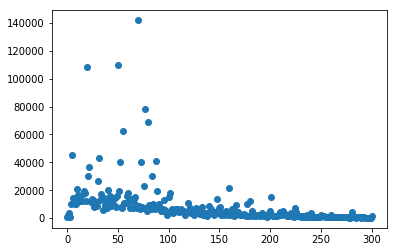

In [10]:
plt.plot(a['payprice'],a['count'],'o')

In [3]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

adexchange      49829
domain         137135
url             86812
urlid         2430981
keypage        504990
usertag        497479
dtype: int64

In [4]:
df.dtypes

click               int64
weekday             int64
hour                int64
bidid              object
userid             object
useragent          object
IP                 object
region              int64
city                int64
adexchange        float64
domain             object
url                object
urlid             float64
slotid             object
slotwidth           int64
slotheight          int64
slotvisibility     object
slotformat         object
slotprice           int64
creative           object
bidprice            int64
payprice            int64
keypage            object
advertiser          int64
usertag            object
dtype: object

In [5]:
for i in list(df):
    print(i, ': ', len(df[i].unique()))

click :  2
weekday :  7
hour :  24
bidid :  2430981
userid :  2342677
useragent :  38
IP :  503975
region :  35
city :  370
adexchange :  5
domain :  23013
url :  763961
urlid :  1
slotid :  52283
slotwidth :  21
slotheight :  14
slotvisibility :  11
slotformat :  4
slotprice :  286
creative :  131
bidprice :  8
payprice :  301
keypage :  19
advertiser :  9
usertag :  744036


In [7]:
# # col_remove = ['click', 'urlid','city','slotwidth','adexchange']
# x = data_final.drop('click',axis=1)
# y = data_final['click']

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [2]:
val = pd.read_csv('/Users/tuxiaochi/Desktop/jupyternb/we_data/validation.csv')
val.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [9]:
cat_vars=['click','region','weekday','useragent','adexchange','slotheight','slotvisibility','advertiser','bidprice','payprice']
x = val[cat_vars]

cat_vars=['region','weekday','useragent','adexchange','slotheight','slotvisibility','advertiser']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(x[var], prefix=var)
    data1=x.join(cat_list)
    x=data1
    
cat_vars=['region','weekday','useragent','adexchange','slotheight','slotvisibility','advertiser']

data_vars=x.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final2=x[to_keep]


In [12]:
list(data_final2)

['click',
 'bidprice',
 'payprice',
 'region_0',
 'region_1',
 'region_2',
 'region_3',
 'region_15',
 'region_27',
 'region_40',
 'region_55',
 'region_65',
 'region_79',
 'region_80',
 'region_94',
 'region_106',
 'region_124',
 'region_134',
 'region_146',
 'region_164',
 'region_183',
 'region_201',
 'region_216',
 'region_238',
 'region_253',
 'region_275',
 'region_276',
 'region_298',
 'region_308',
 'region_325',
 'region_333',
 'region_344',
 'region_359',
 'region_368',
 'region_374',
 'region_393',
 'region_394',
 'region_395',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'useragent_android_chrome',
 'useragent_android_firefox',
 'useragent_android_opera',
 'useragent_android_other',
 'useragent_android_safari',
 'useragent_android_sogou',
 'useragent_ios_other',
 'useragent_ios_safari',
 'useragent_linux_chrome',
 'useragent_linux_firefox',
 'useragent_linux_ie',
 'useragent_linux_opera',
 'useragent_linux_other',
 'user

In [10]:
rem = []
for i in range(len(data_final.columns.tolist())):
    if data_final.columns.tolist()[i] not in data_final2.columns.tolist():
        rem.append(data_final.columns.tolist()[i])
rem.append('click')

x = data_final.drop(rem,axis=1)
y = data_final['click']

logreg = LogisticRegression()
logreg.fit(x, y)

/Users/tuxiaochi/.virtualenvs/jupyternb/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
# col_remove = ['click', 'urlid','city','slotwidth','adexchange']
x2 = data_final2.drop('click',axis=1)
y2 = data_final2['click']

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
y_pred = logreg.predict(x2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x2, y2)))

Accuracy of logistic regression classifier on test set: 1.00


In [19]:
xx = pd.read_csv('/Users/tuxiaochi/Desktop/jupyternb/we_data/Group_xx.csv')
len(xx)

303375

In [3]:
6250/len(val)

0.020564283951632803

In [21]:
xx

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,0.0
1,29167d4caa719788b5a342dbaa25151d53121f80,0.0
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,0.0
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,0.0
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,0.0
5,7493c42f6d8f29d9f414b75c125ce3db40461ef9,0.0
6,819fb6958ea48b10430710d009c57d55a31debcb,0.0
7,8660774f6c94e32dfbd46add8a9bc94df3c74130,0.0
8,ccc4c75ae4fd33526e5ecdae482c45c1dabc94db,0.0
9,d9a212303746d85553966e902a315ba8812dd138,0.0
